In [1]:
import pandas as pd
pd.set_option("display.max_columns",100)
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
##from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split

# EDA 

In [3]:
df=pd.read_csv("profiles.csv")

In [4]:
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22.0,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1.0,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35.0,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,80000.0,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38.0,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",NaN,68.0,-1.0,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23.0,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,white,71.0,20000.0,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29.0,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\nat the...",NaN,NaN,NaN,NaN,NaN,"asian, black, other",66.0,-1.0,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [5]:
df.tail()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
60547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(60552, 31)

In [7]:
df.isnull().sum()

age            51038
body_type      51886
diet           54791
drinks         51540
drugs          53337
education      52093
essay0         51885
essay1         52205
essay2         52503
essay3         52862
essay4         52673
essay5         52738
essay6         53200
essay7         52999
essay8         54191
essay9         52998
ethnicity      51987
height         51038
income         51038
job            52369
last_online    51038
location       51038
offspring      56666
orientation    51038
pets           54200
religion       54291
sex            51038
sign           52776
smokes         51956
speaks         51044
status         51038
dtype: int64

In [8]:
df.describe()

,age,height,income
count,9514.000000,9514.000000,9514.000000
mean,32.084192,68.337398,18887.145155
std,9.445488,3.905229,91428.807808
min,18.000000,36.000000,-1.000000
25%,25.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,36.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


In [9]:
## Gereksiz bir  şekilde tüm kolonlardaki Na kayıtlardan dolayı Duplicate Temizliği Yapılmaktadır.
df=df.drop_duplicates()[:9514]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9514 entries, 0 to 9513
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          9514 non-null   float64
 1   body_type    8666 non-null   object 
 2   diet         5761 non-null   object 
 3   drinks       9012 non-null   object 
 4   drugs        7215 non-null   object 
 5   education    8459 non-null   object 
 6   essay0       8667 non-null   object 
 7   essay1       8347 non-null   object 
 8   essay2       8049 non-null   object 
 9   essay3       7690 non-null   object 
 10  essay4       7879 non-null   object 
 11  essay5       7814 non-null   object 
 12  essay6       7352 non-null   object 
 13  essay7       7553 non-null   object 
 14  essay8       6361 non-null   object 
 15  essay9       7554 non-null   object 
 16  ethnicity    8565 non-null   object 
 17  height       9514 non-null   float64
 18  income       9514 non-null   float64
 19  job   

In [11]:
df.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')

In [12]:
## Aşağıdaki alanlarda  Free Text olduğundan Regression veya Classification Konu olamaz 
## Ve silinmesi Daha doğru olur.

columns = ['essay0',  'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9']
df.drop(columns, inplace=True, axis=1)

In [13]:
df.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'ethnicity',
       'height', 'income', 'job', 'last_online', 'location', 'offspring',
       'orientation', 'pets', 'religion', 'sex', 'sign', 'smokes', 'speaks',
       'status'],
      dtype='object')

In [14]:
# Function Tanımlıyoruz.

In [15]:
##Her Seferinde Tek Tek Yazmak Yerine Bi tane Function işimizi Görecektir. DataType bağlı Cond. Çalıştırır.
def fnc_Column_Analysis (pcolumn):
    if(df[pcolumn].dtype == 'O'):
        print('Data Type String')
        print(pcolumn,'Unique List..................................:',df[pcolumn].unique())
        print(pcolumn,'Mode List....................................:',df[pcolumn].mode())
        print(pcolumn,'NullCount List...............................:',df[pcolumn].isnull().sum())      
        
        df[pcolumn].value_counts().plot.bar()
        
        if df[pcolumn].isnull().sum()>0:
            print('Na Dönüşümü Yapıldı')
            df[pcolumn].fillna(df[pcolumn].mode()[0], inplace=True)
        
    elif(df[pcolumn].dtype != 'O'):
        print('Data Type integer')        
        print(pcolumn,'Mean List....................................:',df[pcolumn].mean())
        print(pcolumn,'NullCount List...............................:',df[pcolumn].isnull().sum())
        
        sns.boxplot(df[pcolumn])

        if df[pcolumn].isnull().sum()>0:
            print('Na Dönüşümü Yapıldı')
            df[pcolumn].fillna(df[pcolumn].mean(), inplace=True)        
            ##df.LotFrontage.fillna(df.LotFrontage.mean(),inplace=True)

In [16]:
## body_type

In [17]:
df.body_type.value_counts().sort_values(ascending=False)

average           2274
fit               2040
athletic          1888
thin               740
curvy              626
a little extra     430
skinny             269
full figured       181
overweight          69
jacked              64
used up             47
rather not say      38
Name: body_type, dtype: int64

In [18]:
v_body_type={"average":"fit",
              "fit":"fit",
              "athletic":"fit",
              "thin":"fit",
              "curvy":"curvy",
              "a little extra":"curvy",
              "skinny":"fit",
              "full figured":"curvy",
              "overweight":"bad",
              "jacked":"bad",
              "used up":"bad",
              "rather not say":"curvy"
             }
df.body_type.replace(v_body_type,inplace=True)


In [19]:
df.body_type.isnull().sum()

848

Data Type String
body_type Unique List..................................: ['curvy' 'fit' nan 'bad']
body_type Mode List....................................: 0    fit
Name: body_type, dtype: object
body_type NullCount List...............................: 848
Na Dönüşümü Yapıldı


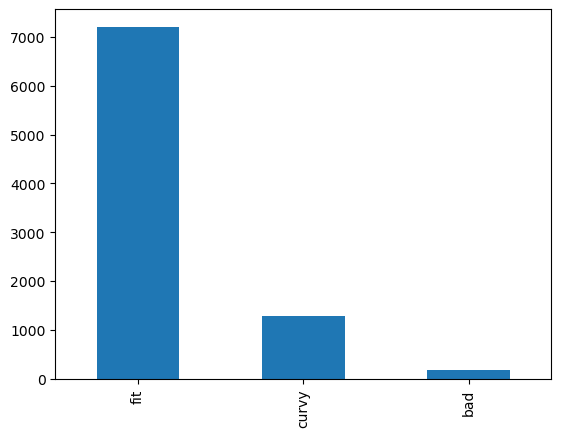

In [20]:
fnc_Column_Analysis('body_type')

In [21]:
df.diet.value_counts().sort_values(ascending=False)

mostly anything        2621
anything               1067
strictly anything       835
mostly vegetarian       568
mostly other            154
strictly vegetarian     135
vegetarian              111
strictly other           64
other                    52
mostly vegan             52
strictly vegan           40
vegan                    28
mostly halal             13
mostly kosher            12
strictly halal            4
strictly kosher           2
kosher                    2
halal                     1
Name: diet, dtype: int64

Data Type String
diet Unique List..................................: ['strictly anything' 'mostly other' 'anything' 'vegetarian' nan
 'mostly anything' 'mostly vegetarian' 'strictly vegan'
 'strictly vegetarian' 'mostly vegan' 'strictly other' 'mostly halal'
 'other' 'vegan' 'mostly kosher' 'strictly halal' 'halal'
 'strictly kosher' 'kosher']
diet Mode List....................................: 0    mostly anything
Name: diet, dtype: object
diet NullCount List...............................: 3753
Na Dönüşümü Yapıldı


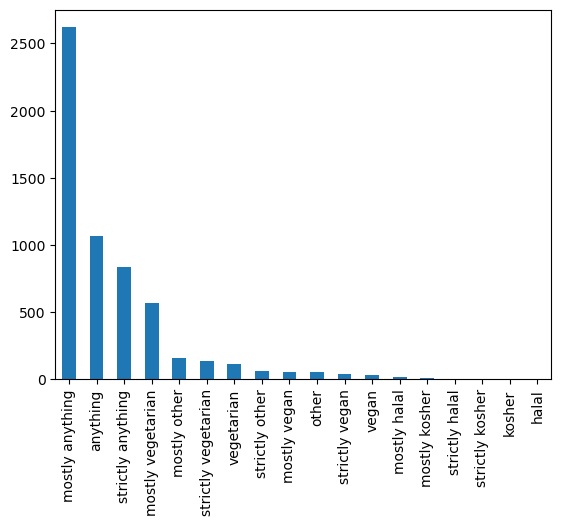

In [22]:
fnc_Column_Analysis('diet')

In [23]:
## Baştaki Çoğunlukla veya Kesinlikle bilg. kaldırıyoruz.
status={"mostly":"","strictly":""}
df["diet"].replace(status,regex=True,inplace=True)

Data Type String
drinks Unique List..................................: ['socially' 'often' 'not at all' 'rarely' nan 'very often' 'desperately']
drinks Mode List....................................: 0    socially
Name: drinks, dtype: object
drinks NullCount List...............................: 502
Na Dönüşümü Yapıldı


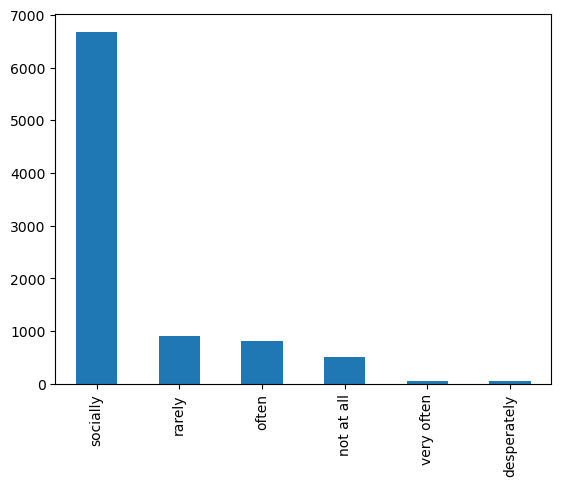

In [24]:
fnc_Column_Analysis('drinks')

Data Type String
drugs Unique List..................................: ['never' 'sometimes' nan 'often']
drugs Mode List....................................: 0    never
Name: drugs, dtype: object
drugs NullCount List...............................: 2299
Na Dönüşümü Yapıldı


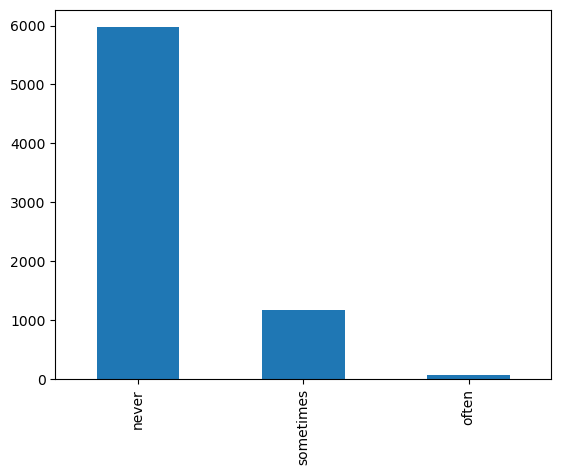

In [25]:
fnc_Column_Analysis('drugs')

In [26]:
df.education.value_counts().sort_values(ascending=False)

graduated from college/university    3770
graduated from masters program       1402
working on college/university         969
working on masters program            251
graduated from two-year college       245
graduated from high school            205
graduated from ph.d program           203
graduated from law school             177
working on two-year college           159
working on ph.d program               159
dropped out of college/university     149
college/university                    134
graduated from space camp             104
dropped out of space camp              87
graduated from med school              73
working on space camp                  73
working on law school                  55
two-year college                       43
working on med school                  41
dropped out of two-year college        34
masters program                        21
working on high school                 20
dropped out of ph.d program            19
dropped out of masters program    

In [27]:
##Education datasını sadeleştirme yapıyoruz.

df["education"].replace({"working on":"student","graduated from":"graduated","dropped out":"dropped"},regex=True)
df["education"]=df["education"].str.split().str[0]
df["education"].replace({"college/university":"student","two-year":"student","masters":"student","working":"student","space":"student","ph.d":"graduated","law":"graduated","high":"graduated"},regex=True,inplace=True)


Data Type String
education Unique List..................................: ['student' 'graduated' nan 'dropped']
education Mode List....................................: 0    graduated
Name: education, dtype: object
education NullCount List...............................: 1055
Na Dönüşümü Yapıldı


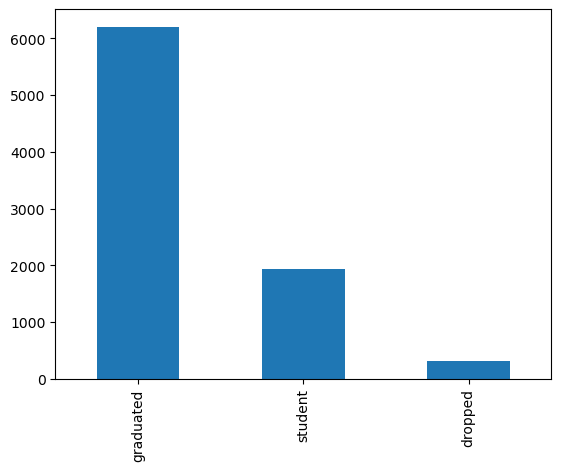

In [28]:
fnc_Column_Analysis('education')

In [29]:
df.ethnicity.value_counts().sort_values(ascending=False)

white                                                            5278
asian                                                             863
hispanic / latin                                                  426
black                                                             326
other                                                             319
                                                                 ... 
native american, other                                              1
asian, middle eastern, indian, hispanic / latin, white, other       1
middle eastern, black, white                                        1
middle eastern, black, pacific islander, white                      1
middle eastern, hispanic / latin, white, other                      1
Name: ethnicity, Length: 112, dtype: int64

In [30]:
df.job.value_counts().sort_values(ascending=False)

other                                1153
student                               807
science / tech / engineering          780
artistic / musical / writer           715
computer / hardware / software        709
sales / marketing / biz dev           709
medicine / health                     613
education / academia                  538
executive / management                378
entertainment / media                 356
banking / financial / real estate     353
hospitality / travel                  217
law / legal services                  200
construction / craftsmanship          178
clerical / administrative             117
political / government                105
rather not say                         68
transportation                         64
unemployed                             56
retired                                38
military                               29
Name: job, dtype: int64

In [31]:
## Etnik ve Meslek alanlara da ihtiyaç bulunmadığından silinmesi daha doğru olacaktır.

columns = ['ethnicity','job']
df.drop(columns, inplace=True, axis=1)

<AxesSubplot:xlabel='height'>

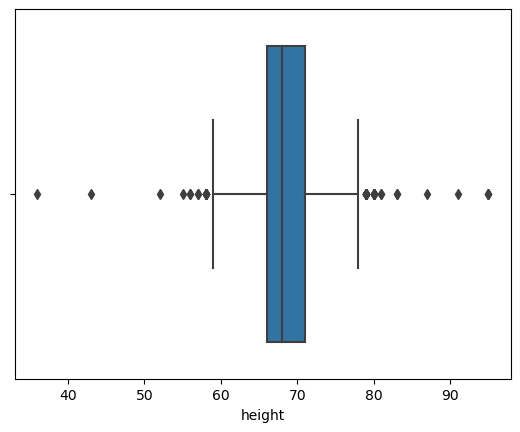

In [32]:
sns.boxplot("height",data=df)

<AxesSubplot:xlabel='income'>

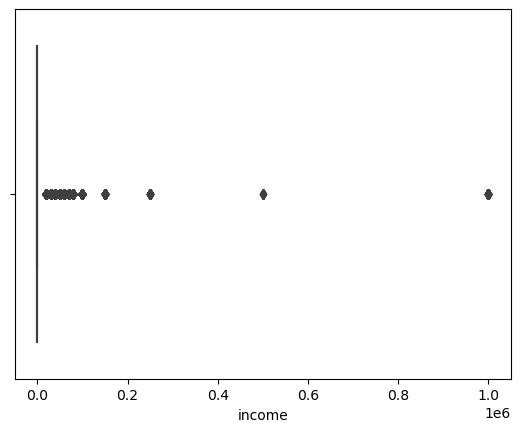

In [33]:
sns.boxplot("income",data=df)

In [34]:
df["last_online"].value_counts().sort_values(ascending=False)

2012-06-29-22-56    15
2012-06-29-22-35    11
2012-06-29-22-58    11
2012-06-29-22-33    11
2012-06-29-22-55    10
                    ..
2012-06-07-15-29     1
2012-06-24-18-11     1
2012-04-08-08-37     1
2012-06-29-16-00     1
2012-06-14-15-14     1
Name: last_online, Length: 6763, dtype: int64

<AxesSubplot:xlabel='last_online_year', ylabel='count'>

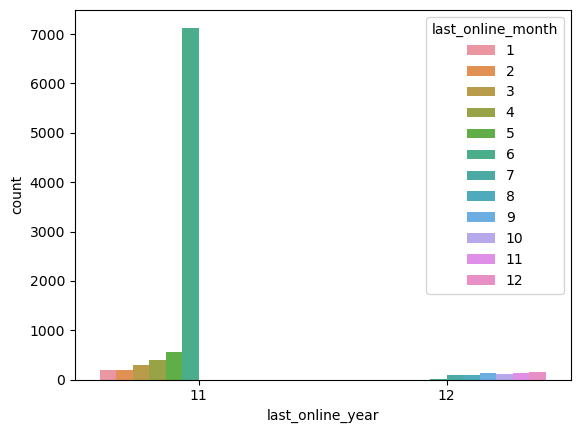

In [35]:
# Yıl ve Ay Olacak 2 Kolon olarak  ayırmaktayız.
df["last_online_year"]=2023-(df['last_online'].str[:4]).astype(int)
df["last_online_month"]=(df['last_online'].str[5:7]).astype(int)
df.drop('last_online',axis=1)
sns.countplot("last_online_year",hue="last_online_month",data=df)

<AxesSubplot:>

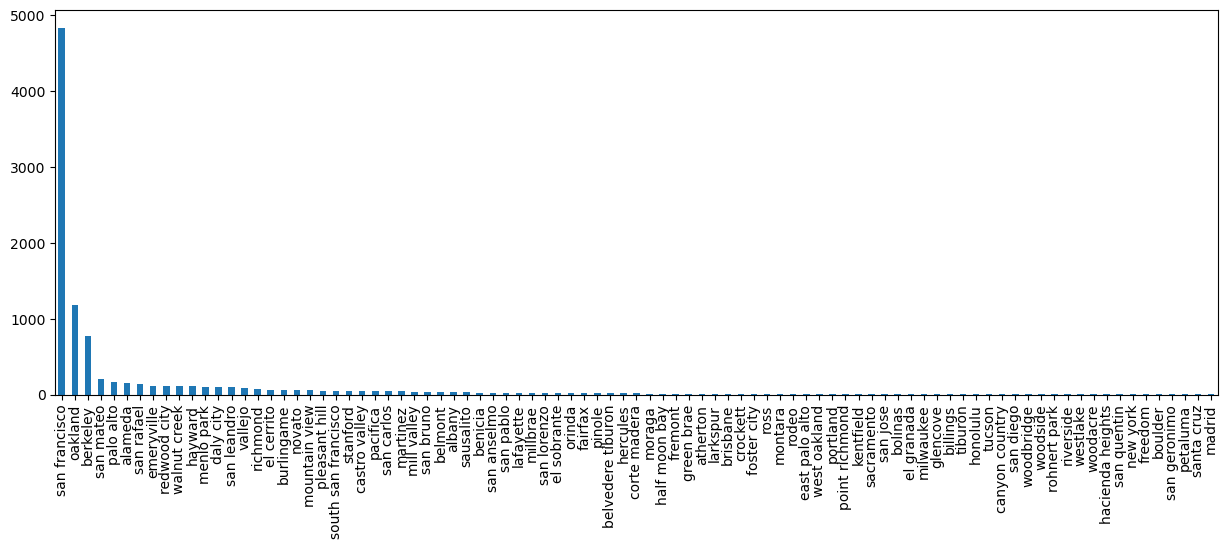

In [36]:
df.location=df.location.str.split(",").str[0]
plt.figure(figsize=(15,5))
df.location.value_counts().plot.bar()

In [37]:
df.location.value_counts().sort_values(ascending=False)

san francisco    4835
oakland          1181
berkeley          768
san mateo         207
palo alto         170
                 ... 
honolulu            1
tiburon             1
billings            1
milwaukee           1
madrid              1
Name: location, Length: 89, dtype: int64

In [38]:
df.offspring

0            doesn&rsquo;t have kids, but might want them
1            doesn&rsquo;t have kids, but might want them
2                                                     NaN
3                                 doesn&rsquo;t want kids
4                                                     NaN
                              ...                        
9509              doesn&rsquo;t have kids, but wants them
9510                                                  NaN
9511                              doesn&rsquo;t want kids
9512    doesn&rsquo;t have kids, and doesn&rsquo;t wan...
9513                                                  NaN
Name: offspring, Length: 9514, dtype: object

<AxesSubplot:>

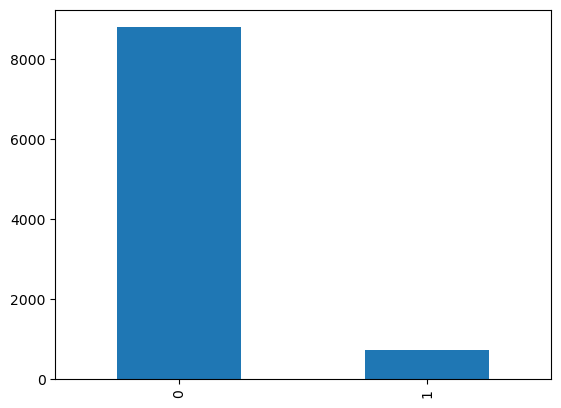

In [39]:
offsprings=[]
for i in df.offspring.fillna("Unknown").str.replace("[^\w\s]",""):
    if "doesnrsquot" in i:
        offsprings.append("0")
    elif "Unknown" in i:
        offsprings.append("0")
    else:
        offsprings.append("1")
        
df["offspring"]=offsprings
df["offspring"]=df["offspring"].astype(int)
df["offspring"].value_counts().plot.bar()

<AxesSubplot:>

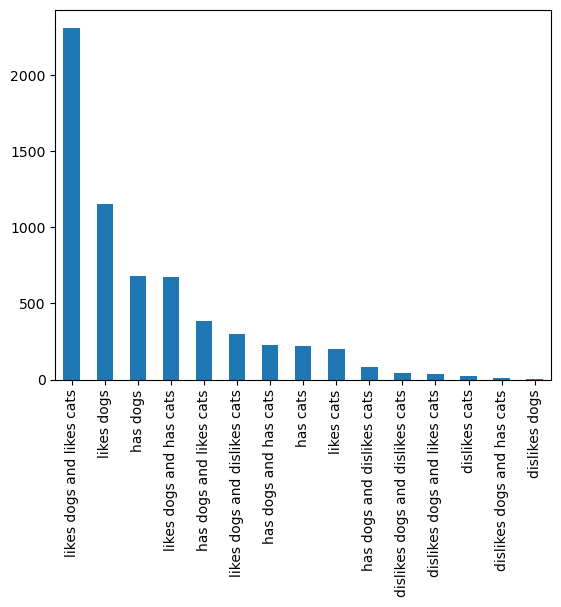

In [40]:
df.pets.value_counts().plot.bar()

In [41]:
df.pets.unique()

array(['likes dogs and likes cats', 'has cats', 'likes cats', nan,
       'has dogs and likes cats', 'likes dogs and has cats',
       'likes dogs and dislikes cats', 'has dogs',
       'has dogs and dislikes cats', 'likes dogs',
       'has dogs and has cats', 'dislikes dogs and has cats',
       'dislikes dogs and dislikes cats', 'dislikes cats',
       'dislikes dogs and likes cats', 'dislikes dogs'], dtype=object)

Data Type String
pets Unique List..................................: ['likes dogs and likes cats' 'has cats' 'likes cats' nan
 'has dogs and likes cats' 'likes dogs and has cats'
 'likes dogs and dislikes cats' 'has dogs' 'has dogs and dislikes cats'
 'likes dogs' 'has dogs and has cats' 'dislikes dogs and has cats'
 'dislikes dogs and dislikes cats' 'dislikes cats'
 'dislikes dogs and likes cats' 'dislikes dogs']
pets Mode List....................................: 0    likes dogs and likes cats
Name: pets, dtype: object
pets NullCount List...............................: 3162
Na Dönüşümü Yapıldı


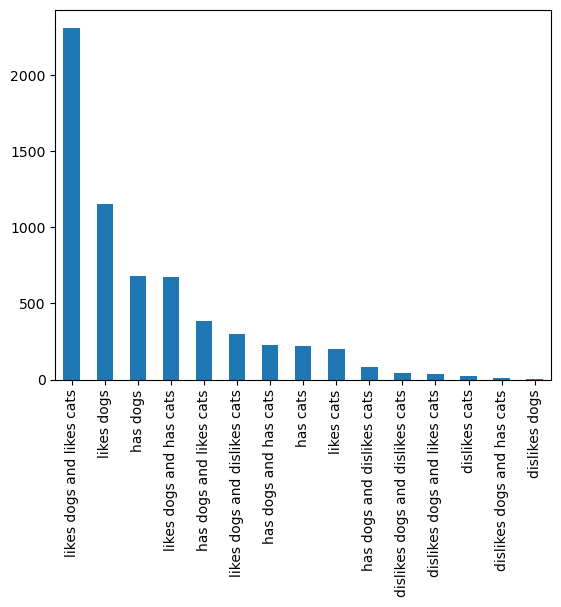

In [42]:
fnc_Column_Analysis ('pets')

<AxesSubplot:>

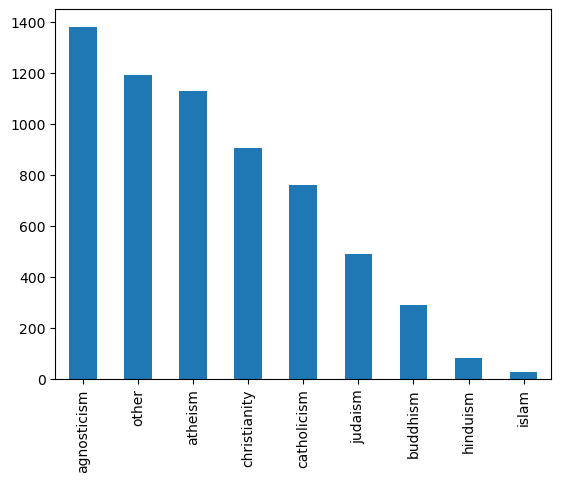

In [43]:
df["religion"]=df["religion"].str.split().str[0]
df["religion"].value_counts().plot.bar()

Data Type String
religion Unique List..................................: ['agnosticism' nan 'atheism' 'christianity' 'other' 'catholicism'
 'buddhism' 'judaism' 'hinduism' 'islam']
religion Mode List....................................: 0    agnosticism
Name: religion, dtype: object
religion NullCount List...............................: 3253
Na Dönüşümü Yapıldı


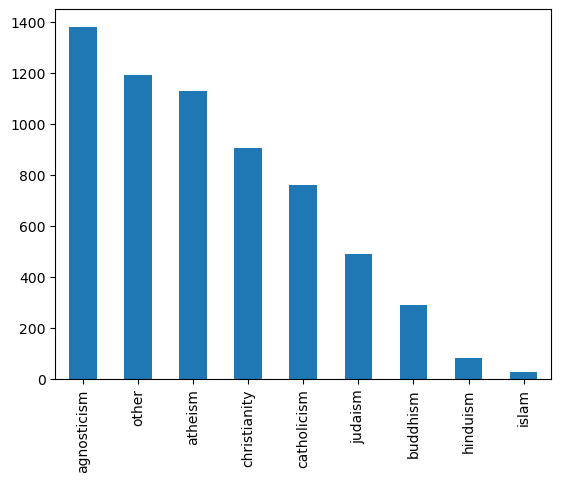

In [44]:
fnc_Column_Analysis ('religion')

<AxesSubplot:>

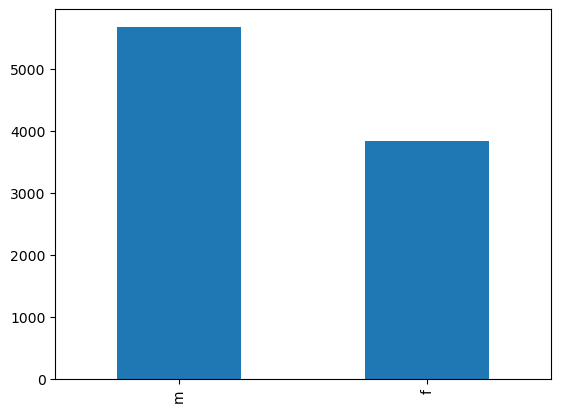

In [45]:
df.sex.value_counts().plot.bar()

<AxesSubplot:>

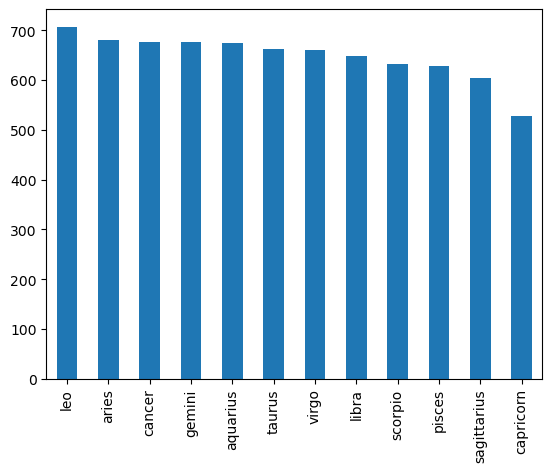

In [46]:
df["sign"]=df["sign"].str.split().str[0]
df["sign"].value_counts().plot.bar()

Data Type String
sign Unique List..................................: ['gemini' 'cancer' 'pisces' 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'leo' nan 'aries' 'libra' 'scorpio' 'capricorn']
sign Mode List....................................: 0    leo
Name: sign, dtype: object
sign NullCount List...............................: 1738
Na Dönüşümü Yapıldı


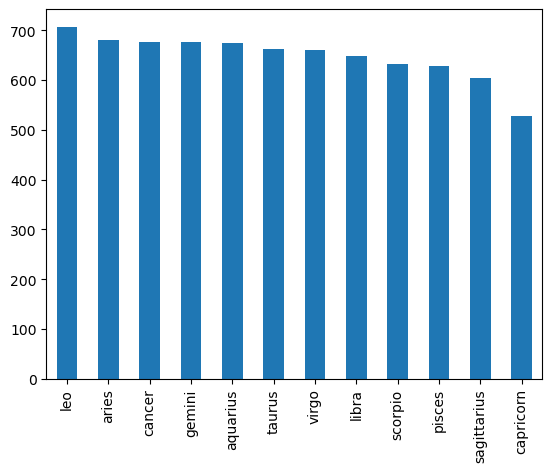

In [47]:
fnc_Column_Analysis ('sign')

In [48]:
df.smokes.unique()

array(['sometimes', 'no', nan, 'when drinking', 'yes', 'trying to quit'],
      dtype=object)

Data Type String
smokes Unique List..................................: ['sometimes' 'no' nan 'when drinking' 'yes' 'trying to quit']
smokes Mode List....................................: 0    no
Name: smokes, dtype: object
smokes NullCount List...............................: 918
Na Dönüşümü Yapıldı


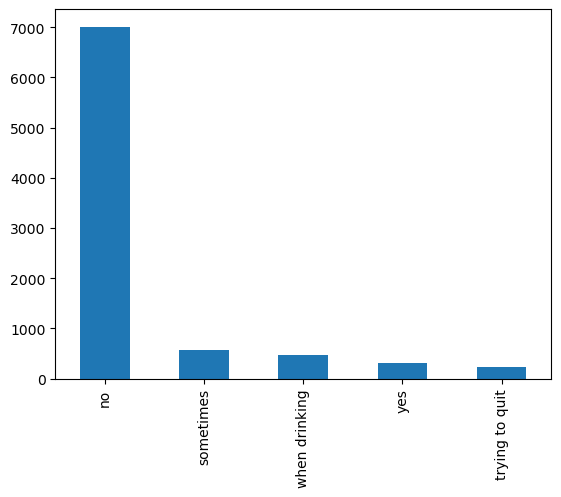

In [49]:
fnc_Column_Analysis ('smokes')

In [50]:
df.speaks.unique()

array(['english', 'english (fluently), spanish (poorly), french (poorly)',
       'english, french, c++', ...,
       'english (fluently), french (okay), spanish (poorly), sign language (poorly)',
       'english (fluently), spanish, swedish',
       'english (fluently), french (okay), swedish (poorly)'],
      dtype=object)

In [51]:
df["number_of_fluent_languages"]=df.speaks.str.count("fluently")
df["number_of_fluent_languages"].replace(0,1,regex=True,inplace=True)
df["number_of_poorly_languages"]=df.speaks.str.count("poorly")
df.drop("speaks",axis=1,inplace=True)

<AxesSubplot:xlabel='number_of_fluent_languages', ylabel='count'>

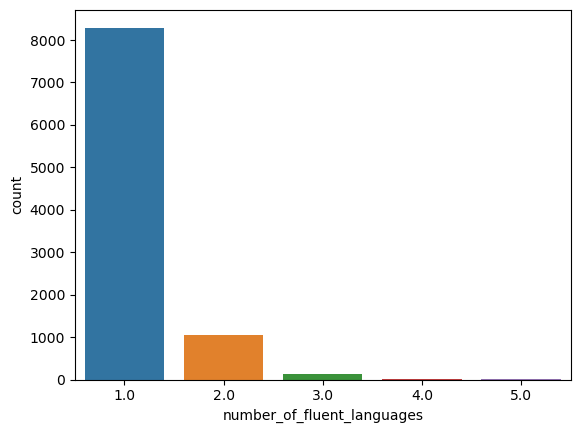

In [52]:
sns.countplot(df["number_of_fluent_languages"])

<AxesSubplot:>

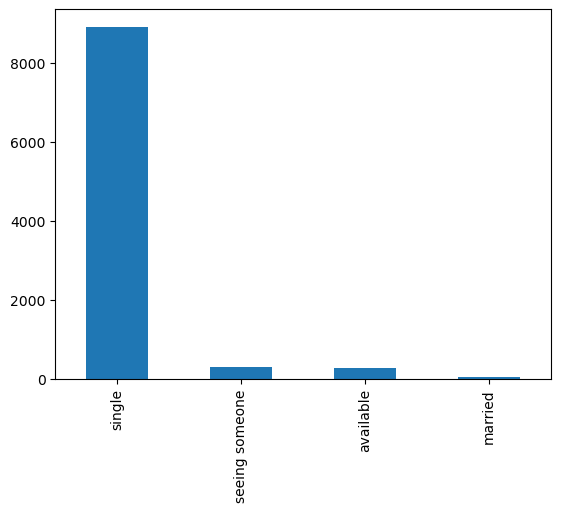

In [53]:
df.status.value_counts().plot.bar()

In [54]:
generation=[]
for i in df["age"].values:
    if (i>=18) and (i<=32):
        generation.append("Millennial")
    elif (i>=33) and (i<=47):
        generation.append("Gen X-er")
    elif (48>=33) and (i<=70):
        generation.append("Boomers")
    else:
        generation.append("Unkown")

df["generation"]=generation

<AxesSubplot:>

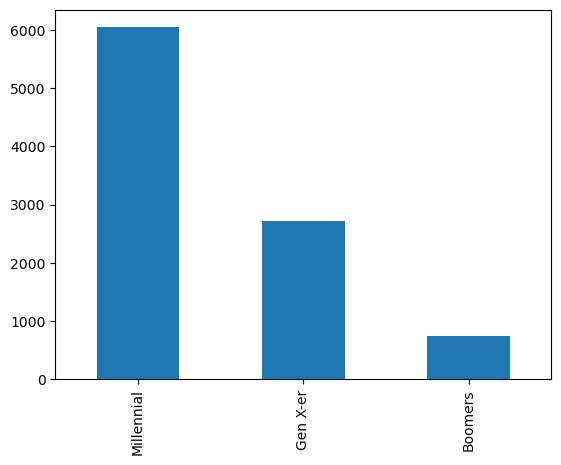

In [55]:
df["generation"].replace("Unkown","Boomers",regex=True,inplace=True)
df["generation"].value_counts().plot.bar()

<AxesSubplot:>

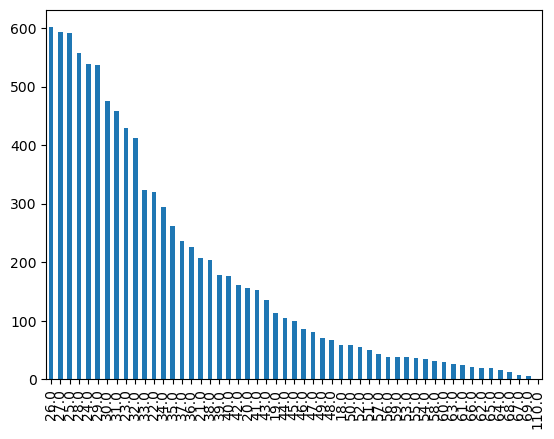

In [56]:
df.age.value_counts().plot.bar()

In [57]:
df.head()

,age,body_type,diet,drinks,drugs,education,height,income,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,status,last_online_year,last_online_month,number_of_fluent_languages,number_of_poorly_languages,generation
0,22.0,curvy,anything,socially,never,student,75.0,-1.0,2012-06-28-20-30,south san francisco,0,straight,likes dogs and likes cats,agnosticism,m,gemini,sometimes,single,11,6,1.0,0.0,Millennial
1,35.0,fit,other,often,sometimes,student,70.0,80000.0,2012-06-29-21-41,oakland,0,straight,likes dogs and likes cats,agnosticism,m,cancer,no,single,11,6,1.0,2.0,Gen X-er
2,38.0,fit,anything,socially,never,graduated,68.0,-1.0,2012-06-27-09-10,san francisco,0,straight,has cats,agnosticism,m,pisces,no,available,11,6,1.0,0.0,Gen X-er
3,23.0,fit,vegetarian,socially,never,student,71.0,20000.0,2012-06-28-14-22,berkeley,0,straight,likes cats,agnosticism,m,pisces,no,single,11,6,1.0,1.0,Millennial
4,29.0,fit,anything,socially,never,graduated,66.0,-1.0,2012-06-27-21-26,san francisco,0,straight,likes dogs and likes cats,agnosticism,m,aquarius,no,single,11,6,1.0,0.0,Millennial


In [58]:
df.corr()

,age,height,income,offspring,last_online_year,last_online_month,number_of_fluent_languages,number_of_poorly_languages
age,1.000000,-0.022078,0.011424,0.341753,-0.015792,-0.003527,-0.024715,-0.001434
height,-0.022078,1.000000,0.073105,-0.033389,-0.016633,-0.010858,0.015453,0.036413
income,0.011424,0.073105,1.000000,0.015045,0.009376,0.002043,0.039227,0.028635
offspring,0.341753,-0.033389,0.015045,1.000000,0.029129,0.005697,0.000918,-0.012200
last_online_year,-0.015792,-0.016633,0.009376,0.029129,1.000000,0.685183,-0.003878,-0.034927
last_online_month,-0.003527,-0.010858,0.002043,0.005697,0.685183,1.000000,-0.006667,-0.006251
number_of_fluent_languages,-0.024715,0.015453,0.039227,0.000918,-0.003878,-0.006667,1.000000,0.067665
number_of_poorly_languages,-0.001434,0.036413,0.028635,-0.012200,-0.034927,-0.006251,0.067665,1.000000


<AxesSubplot:>

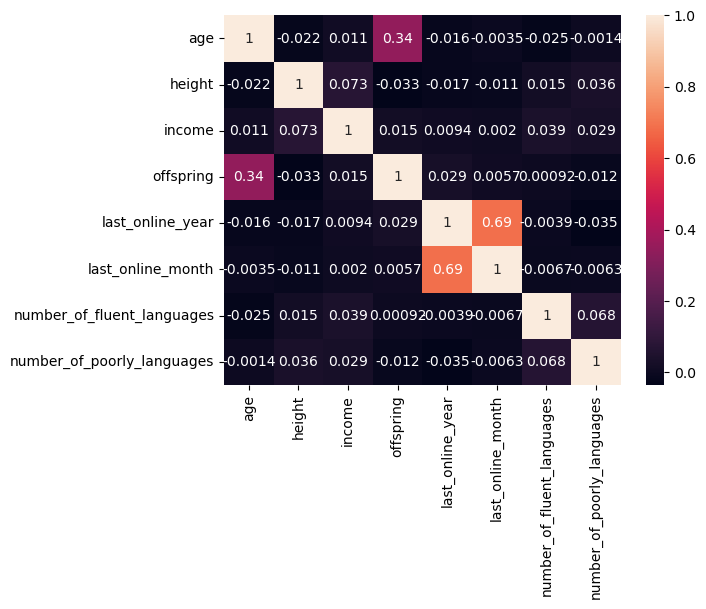

In [59]:
sns.heatmap(df.corr(),annot=True)

Data Type integer
age Mean List....................................: 32.08419171746899
age NullCount List...............................: 0


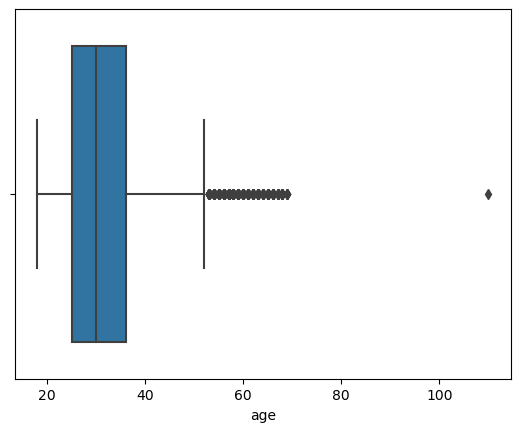

In [60]:
fnc_Column_Analysis ('age')

In [61]:
df["age"]=df["age"].astype(int)

In [62]:
df["age"] =np.where(df["age"] > 70, 70, df["age"])

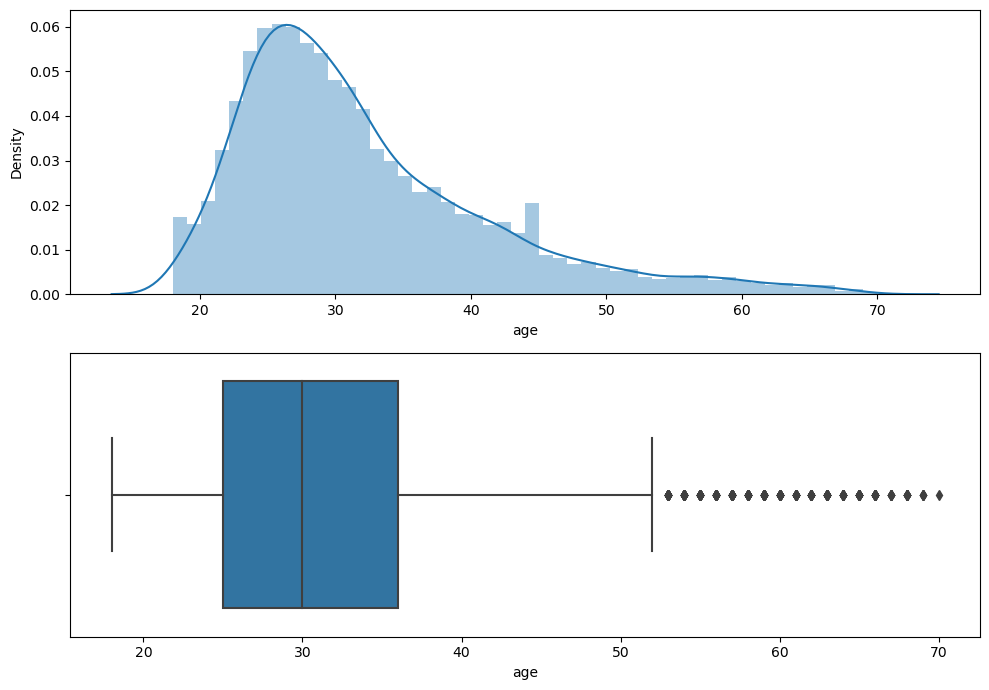

In [63]:
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(df['age'])
fig.add_subplot(2,1,2)
sns.boxplot(df['age'])
plt.tight_layout();

<AxesSubplot:xlabel='sex', ylabel='age'>

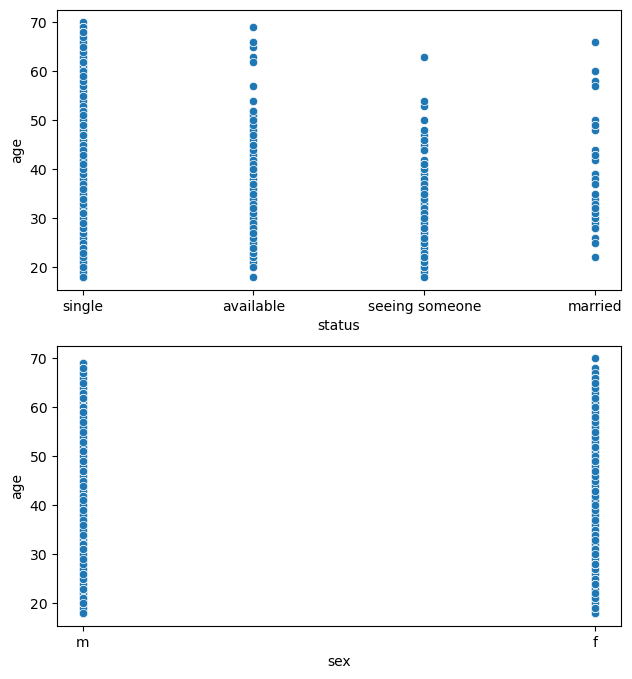

In [64]:
fig = plt.figure(figsize=(16,8))
fig.add_subplot(2,2,1)
sns.scatterplot(df['status'], df['age'])
fig.add_subplot(2,2,3)
sns.scatterplot(df['sex'],df['age'])

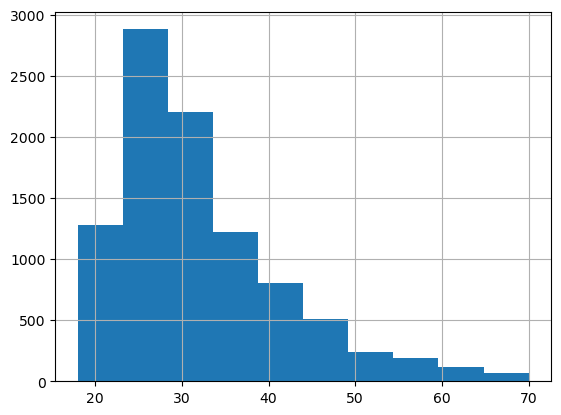

In [65]:
df.age.hist();

In [66]:
abs(df.corr()['age']).sort_values(ascending=False)

age                           1.000000
offspring                     0.342819
number_of_fluent_languages    0.024624
height                        0.021986
last_online_year              0.015706
income                        0.011548
last_online_month             0.003574
number_of_poorly_languages    0.001204
Name: age, dtype: float64

In [67]:
df.isnull().sum()

age                           0
body_type                     0
diet                          0
drinks                        0
drugs                         0
education                     0
height                        0
income                        0
last_online                   0
location                      0
offspring                     0
orientation                   0
pets                          0
religion                      0
sex                           0
sign                          0
smokes                        0
status                        0
last_online_year              0
last_online_month             0
number_of_fluent_languages    6
number_of_poorly_languages    6
generation                    0
dtype: int64

In [68]:
df=df.apply(lambda x:x.fillna(x.value_counts().index[0]))

# Regression Modeling

In [69]:
df_reg_model=pd.get_dummies(df,drop_first=True)

In [70]:
df_reg_model.shape,df.shape

((9514, 6925), (9514, 23))

In [71]:
x,y=df_reg_model.drop("age",axis=1),df[["age"]]

In [72]:
x.isnull().sum()

height                   0
income                   0
offspring                0
last_online_year         0
last_online_month        0
                        ..
status_married           0
status_seeing someone    0
status_single            0
generation_Gen X-er      0
generation_Millennial    0
Length: 6924, dtype: int64

In [73]:
def fnc_all_regression_models(x,y):
    from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import Ridge,Lasso
    from sklearn.linear_model import ElasticNet
    from sklearn.tree import ExtraTreeRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.neighbors import KNeighborsRegressor
    
    from sklearn.model_selection import train_test_split

    from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
    
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    L=LinearRegression()
    R=Ridge()
    Lass=Lasso()
    E=ElasticNet()
    ExTree=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    KN=KNeighborsRegressor()
    
    algos=[L,R,Lass,E,ExTree,GBR,KN]
    algo_names=['LinearRegression','Ridge','Lasso','ElasticNet','ExtraTreeRegressor','GradientBoostingRegressor','KNeighborsRegressor']
    r_squared=[]
    rmse=[]
    mae=[]
    
    result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        r_squared.append(r2_score(y_test,item.predict(x_test)))
        rmse.append((mean_squared_error(y_test,item.predict(x_test)))**.5)
        mae.append(mean_absolute_error(y_test,item.predict(x_test)))
        
    result.R_Squared=r_squared
    result.RMSE=rmse
    result.MAE=mae
        
    return result.sort_values('R_Squared',ascending=False)

In [74]:
fnc_all_regression_models(x,y)

,R_Squared,RMSE,MAE
GradientBoostingRegressor,0.853610,3.647548,2.969583
Ridge,0.837761,3.839934,3.088718
LinearRegression,0.803707,4.223752,3.358004
ExtraTreeRegressor,0.735334,4.904500,3.789280
Lasso,0.571842,6.238041,4.213534
KNeighborsRegressor,0.437877,7.147624,4.765423
ElasticNet,0.308346,7.928491,5.422115


# Classification Models

In [75]:
def fnc_all_classification_models(x,y):
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from xgboost import XGBClassifier 
    
    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    from sklearn.metrics import confusion_matrix,classification_report
       
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    g=GaussianNB()
    b=BernoulliNB()
    KN=KNeighborsClassifier()
    SVC=SVC() 
    D=DecisionTreeClassifier()
    R=RandomForestClassifier()
    Log=LogisticRegression()
    XGB=XGBClassifier()
    
    algos=[g,b,KN,SVC,D,R,Log,XGB]
    algo_names=['GaussianNB','BernoulliNB','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','XGBClassifier']
   
    accuracy_scored=[]

    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        
        accuracy_scored.append(accuracy_score(y_test,item.predict(x_test)))
       
    result=pd.DataFrame(columns=['accuracy_score'],index=algo_names)
    result['accuracy_score']=accuracy_scored
    return result.sort_values('accuracy_score',ascending=False)

In [76]:
##'Boomers' 'Gen X-er' 'Millennial'

df['generation'].replace('Boomers',0,inplace=True)
df['generation'].replace('Gen X-er',1,inplace=True)
df['generation'].replace('Millennial',2,inplace=True)

In [77]:
y=df[["generation"]]

In [78]:
df_class_model=df.drop(["generation","age"],axis=1)

In [79]:
x=pd.get_dummies(df_class_model,drop_first=True)

In [80]:
x.shape,y.shape,df.shape

((9514, 6922), (9514, 1), (9514, 23))

In [81]:
fnc_all_classification_models(x,y)

,accuracy_score
XGBClassifier,0.678403
RandomForestClassifier,0.663689
BernoulliNB,0.662112
SVC,0.647399
GaussianNB,0.642144
LogisticRegression,0.642144
DecisionTreeClassifier,0.614819
KNeighborsClassifier,0.603783
